In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_training = pd.read_csv('drive/MyDrive/Colab Notebooks/data(terbaru)/data_gempa_training.csv')


In [ ]:
dataset_test = pd.read_csv('drive/MyDrive/Colab Notebooks/data(terbaru)/datatest/data_gempa_testing.csv')

In [ ]:
X_train = dataset_training.iloc[:, 2:-3]
y_train = dataset_training.iloc[:, -1]
X_test = dataset_test.iloc[:, 2:-3]
y_test = dataset_test.iloc[:, -1]


In [ ]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

kf = KFold(n_splits=10) #10-Fold-Cross-Validation
for train, test in kf.split(X_train):
  X_Train, X_Test = X_train[train], X_train[test]

for train, test in kf.split(y_train):
  y_Train, y_Test = y_train[train], y_train[test]

for train, test in kf.split(X_train):
  print(len(X_train[train]), len(X_train[test]))
  # print('train: %s, test: %s' % (X_train[train], X_train[test]))

3451 384
3451 384
3451 384
3451 384
3451 384
3452 383
3452 383
3452 383
3452 383
3452 383


In [ ]:
# for train, test in kf.split(y_train):
#   print(len(y_train[train]), len(y_train[test]))
#   print('train: %s, test: %s' % (y_train[train], y_train[test]))

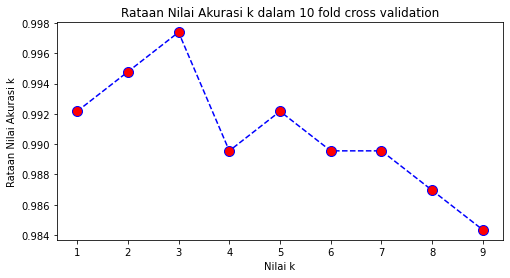

In [ ]:
from sklearn.metrics import accuracy_score #Mencari K Optimal Berdasarkan 10-Fold-Cross-Validation
accuracy_score = []

k_list = list(range(1,10))

for i in k_list:
    newmodel = KNeighborsClassifier(n_neighbors=i)
    newmodel.fit(X_Train, y_Train)
    pred = newmodel.predict(X_Test)
    accuracy_score.append(np.mean(pred == y_Test))

accuracy = [x for x in accuracy_score]

plt.figure(figsize=(8,4))
plt.plot(range(1,10), accuracy_score, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Rataan Nilai Akurasi k dalam 10 fold cross validation')
plt.xlabel('Nilai k')
plt.ylabel('Rataan Nilai Akurasi k')
# plt.savefig('10fold.png', dpi=600)
plt.show()

In [ ]:
best_k = k_list[accuracy.index(max(accuracy))] #Nilai k Optimal rekomendasi berdasarkan evaluasi 10-fold-cross-validation
print("The optimal number of neighbors is %d." %best_k)

The optimal number of neighbors is 3.


In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi :{}%".format(acc*100))
print("Confusion Matrix : ")
print(cm)

Akurasi :99.27007299270073%
Confusion Matrix : 
[[ 31   0   0   0   0]
 [  0 229   2   0   0]
 [  0   1 315   0   0]
 [  0   0   2 192   1]
 [  0   0   0   0  49]]


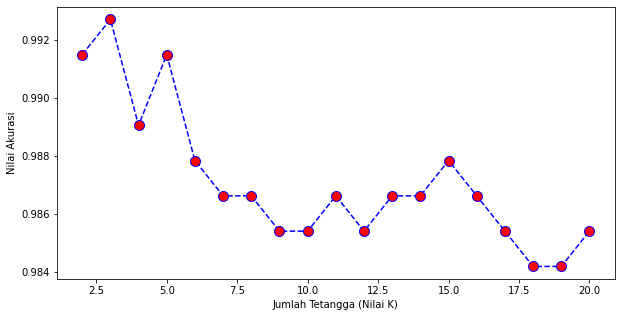

In [ ]:
from sklearn.metrics import accuracy_score #nilai akurasi real KNN untuk k lainnya
accuracy_score = []
for i in range (2,21,1):
    newmodel = KNeighborsClassifier(n_neighbors=i)
    newmodel.fit(X_train, y_train)
    pred = newmodel.predict(X_test)
    accuracy_score.append(np.mean(pred == y_test))
  
plt.figure(figsize=(10,5))
plt.plot(range(2,21,1), accuracy_score, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
# plt.title('Accuracy Score vs K Value')
plt.xlabel('Jumlah Tetangga (Nilai K)')
plt.ylabel('Nilai Akurasi')
# plt.savefig('knn.png', dpi=300)
plt.show()

In [ ]:
#Classification Report
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['Sesar Lawanopo', 'Sesar Matano', 'Sesar Palu Koro', 'Sesar Saddang', 'Sesar Walanae'], digits=4))

                 precision    recall  f1-score   support

 Sesar Lawanopo     1.0000    1.0000    1.0000        31
   Sesar Matano     0.9957    0.9913    0.9935       231
Sesar Palu Koro     0.9875    0.9968    0.9921       316
  Sesar Saddang     1.0000    0.9846    0.9922       195
  Sesar Walanae     0.9800    1.0000    0.9899        49

       accuracy                         0.9927       822
      macro avg     0.9926    0.9946    0.9936       822
   weighted avg     0.9928    0.9927    0.9927       822



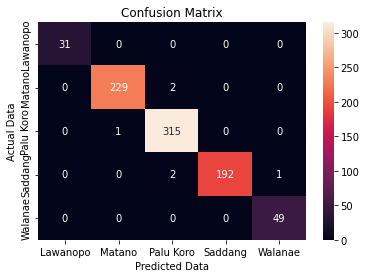

In [ ]:
#ConfusionMatrix
import seaborn as sns
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g');
ax.set_title('Confusion Matrix');
ax.set_xlabel('Predicted Data')
ax.set_ylabel('Actual Data');
ax.xaxis.set_ticklabels(['Lawanopo', 'Matano', 'Palu Koro', 'Saddang', 'Walanae'])
ax.yaxis.set_ticklabels(['Lawanopo', 'Matano', 'Palu Koro', 'Saddang', 'Walanae'])
# # cmp = ConfusionMatrixDisplay(cm, display_labels=['Lawanopo', 'Matano', 'Palu Koro', 'Saddang', 'Walanae'])
sns.set(rc={'figure.figsize':(6,8)})
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# plt.savefig('saving-a-high-resolution-seaborn-plot1.png', dpi=300)
plt.show()


In [ ]:
#Menampilkan dan menyimpan data hasil prediksi klasifikasi
dtt = dataset_test
type(y_pred)
df_new = pd.concat([dtt, pd.DataFrame(y_pred)], axis=1)
df_new = df_new.rename(columns={0: 'Prediksi'})
#df_new.head(450)
df_new.to_excel("test_predicted.xlsx") 

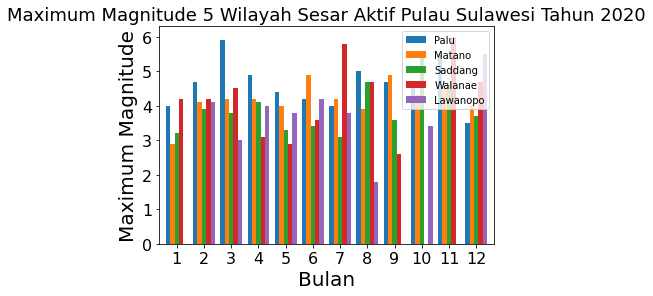

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
  
X = ['1','2','3','4','5','6','7','8','9','10','11','12']
mag = []
Palu = [4,	4.7,	5.9,	4.9,	4.4,	4.2,	4,	5,	4.7,	4.6,	5.5,	3.5]
Matano = [2.9,	4.1,	4.2,	4.2,	4,	4.9,	4.2,	3.9,	4.9,	4.3,	4.5,	4]
Saddang = [3.2,	3.9,	3.8,	4.1,	3.3,	3.4,	3.1,	4.7,	3.6,	5.5,	4.6,	3.7]
Walanae = [4.2,	4.2,	4.5,	3.1,	2.9,	3.6,	5.8,	4.7,	2.6,	0,	6,	4.7]
Lawanopo = [0,	4.1,	3,	4,	3.8,	4.2,	3.8,	1.8,	0,	3.4,	0,	5.5]
  
df = pd.DataFrame({'Palu': Palu,
                   'Matano': Matano,
                   'Saddang': Saddang,
                   'Walanae': Walanae,
                   'Lawanopo': Lawanopo}, index=X)
df.plot.bar(width=0.8, rot=0, fontsize=16)
plt.rcParams["figure.figsize"] = [20, 8]
plt.title('Maximum Magnitude 5 Wilayah Sesar Aktif Pulau Sulawesi Tahun 2020', fontsize=18)
plt.xlabel('Bulan', fontsize=20)
# ax.xaxis.label.set_color('red')
plt.ylabel('Maximum Magnitude', fontsize=20)
# plt.savefig('saving-a-high-resolution-seaborn-plot2.png', dpi=300)
plt.show()